In [1]:
import lightgbm as lgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Create the dataset for LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)


In [5]:
# Set hyperparameters for LightGBM
params = {
  'objective': 'regression',       # Task type: regression
  'metric': 'rmse',                # Metric: RMSE
  'num_leaves': 31,                # Maximum number of leaves in a tree
  'learning_rate': 0.05,           # Learning rate
  'feature_fraction': 0.9          # Fraction of features used at each iteration
}

In [7]:
# Train the model
num_round = 100
model = lgb.train(params, train_data, num_round, valid_sets=[test_data])


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] Start training from score 8.250820
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [8]:
# Make predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

In [9]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2379.736858826183


Text(0.5, 1.0, 'LightGBM')

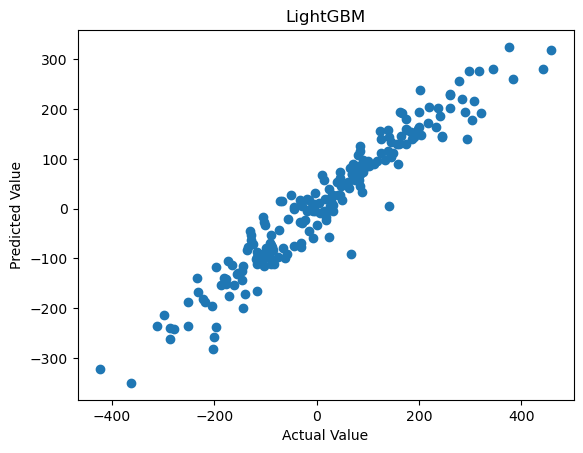

In [10]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('LightGBM')